In [1]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cdsapi
import datetime
import os

%load_ext autotime
%matplotlib inline

diri = %pwd
diri

'C:\\Users\\jimpg\\OneDrive\\Documents\\APWS'

In [2]:
# Read City Hourly Air Pollutant Data to a dataframe
AQ_FILE = "city_hour.csv"

def load_data(file=AQ_FILE):
    aq_path = os.path.join("raw_data", file)
    return pd.read_csv(aq_path)

df = load_data()
df

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707870,Visakhapatnam,2020-06-30 20:00:00,9.50,36.00,2.75,25.57,15.85,4.57,0.62,NaN,27.75,NaN,NaN,NaN,51.0,Satisfactory
707871,Visakhapatnam,2020-06-30 21:00:00,17.25,49.25,3.62,33.20,20.62,3.78,0.76,2.02,25.58,NaN,NaN,NaN,51.0,Satisfactory
707872,Visakhapatnam,2020-06-30 22:00:00,36.00,71.00,2.20,30.80,18.20,3.67,0.58,1.77,26.15,NaN,NaN,NaN,50.0,Good
707873,Visakhapatnam,2020-06-30 23:00:00,15.75,63.00,1.02,28.90,16.00,3.80,0.49,0.75,15.82,NaN,NaN,NaN,50.0,Good


time: 696 ms


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707875 entries, 0 to 707874
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   City        707875 non-null  object 
 1   Datetime    707875 non-null  object 
 2   PM2.5       562787 non-null  float64
 3   PM10        411138 non-null  float64
 4   NO          591243 non-null  float64
 5   NO2         590753 non-null  float64
 6   NOx         584651 non-null  float64
 7   NH3         435333 non-null  float64
 8   CO          621358 non-null  float64
 9   SO2         577502 non-null  float64
 10  O3          578667 non-null  float64
 11  Benzene     544229 non-null  float64
 12  Toluene     487268 non-null  float64
 13  Xylene      252046 non-null  float64
 14  AQI         578795 non-null  float64
 15  AQI_Bucket  578795 non-null  object 
dtypes: float64(13), object(3)
memory usage: 86.4+ MB
time: 70 ms


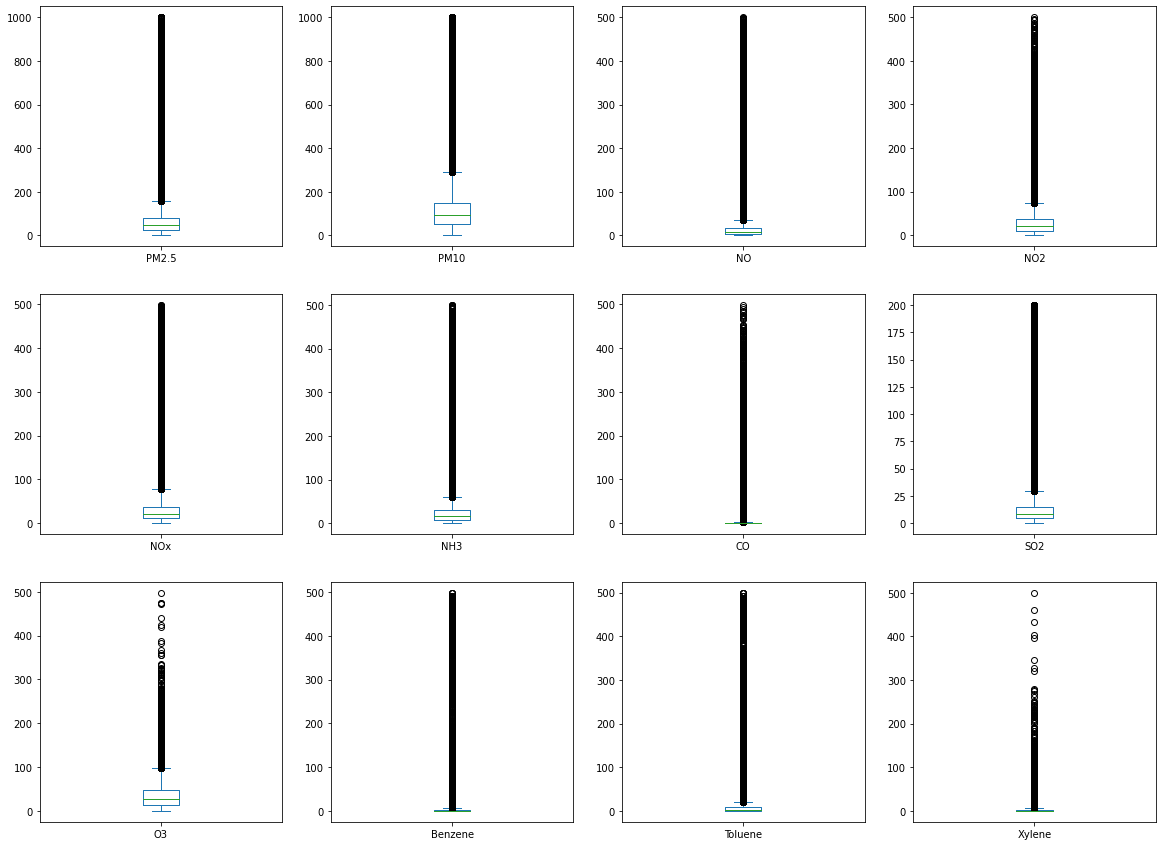

time: 1.09 s


In [50]:
df.plot(kind="box", subplots=True, layout = (3,4), figsize=(20,15))
plt.show()

In [5]:
del df["AQI_Bucket"], df["AQI"] # Do not need these columns
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
count,562787.000000,411138.000000,591243.000000,590753.000000,584651.000000,435333.000000,621358.000000,577502.000000,578667.000000,544229.000000,487268.000000,252046.000000
mean,67.622994,119.075804,17.421755,28.885157,32.287565,23.607959,2.183539,14.038307,34.798979,3.087595,8.660927,3.130537
std,74.730496,104.224752,32.095211,29.162194,39.756669,28.831900,10.970514,19.305540,29.806379,16.456599,21.741023,7.834832
min,0.010000,0.010000,0.010000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000
25%,26.200000,52.380000,3.840000,10.810000,10.660000,8.120000,0.420000,4.880000,13.420000,0.050000,0.370000,0.100000
50%,46.420000,91.500000,7.960000,20.320000,20.790000,15.380000,0.800000,8.370000,26.240000,0.860000,2.590000,0.790000
75%,79.490000,147.520000,16.150000,36.350000,37.150000,29.230000,1.370000,14.780000,47.620000,2.750000,8.410000,3.120000
max,999.990000,1000.000000,499.990000,499.510000,498.610000,499.970000,498.570000,199.960000,497.620000,498.070000,499.400000,499.990000


time: 188 ms


In [6]:
df["City"].value_counts()

Ahmedabad             48192
Delhi                 48192
Mumbai                48192
Bengaluru             48192
Lucknow               48192
Chennai               48192
Hyderabad             48107
Patna                 44554
Gurugram              40258
Visakhapatnam         35053
Amritsar              29269
Jorapokhar            28025
Jaipur                26705
Thiruvananthapuram    26651
Amaravati             22784
Brajrajnagar          22468
Talcher               22161
Kolkata               19503
Guwahati              12002
Coimbatore             9229
Shillong               7402
Chandigarh             7263
Bhopal                 6903
Kochi                  3854
Ernakulam              3852
Aizawl                 2680
Name: City, dtype: int64

time: 25 ms


array([[<AxesSubplot:title={'center':'PM2.5'}>,
        <AxesSubplot:title={'center':'PM10'}>,
        <AxesSubplot:title={'center':'NO'}>],
       [<AxesSubplot:title={'center':'NO2'}>,
        <AxesSubplot:title={'center':'NOx'}>,
        <AxesSubplot:title={'center':'NH3'}>],
       [<AxesSubplot:title={'center':'CO'}>,
        <AxesSubplot:title={'center':'SO2'}>,
        <AxesSubplot:title={'center':'O3'}>],
       [<AxesSubplot:title={'center':'Benzene'}>,
        <AxesSubplot:title={'center':'Toluene'}>,
        <AxesSubplot:title={'center':'Xylene'}>]], dtype=object)

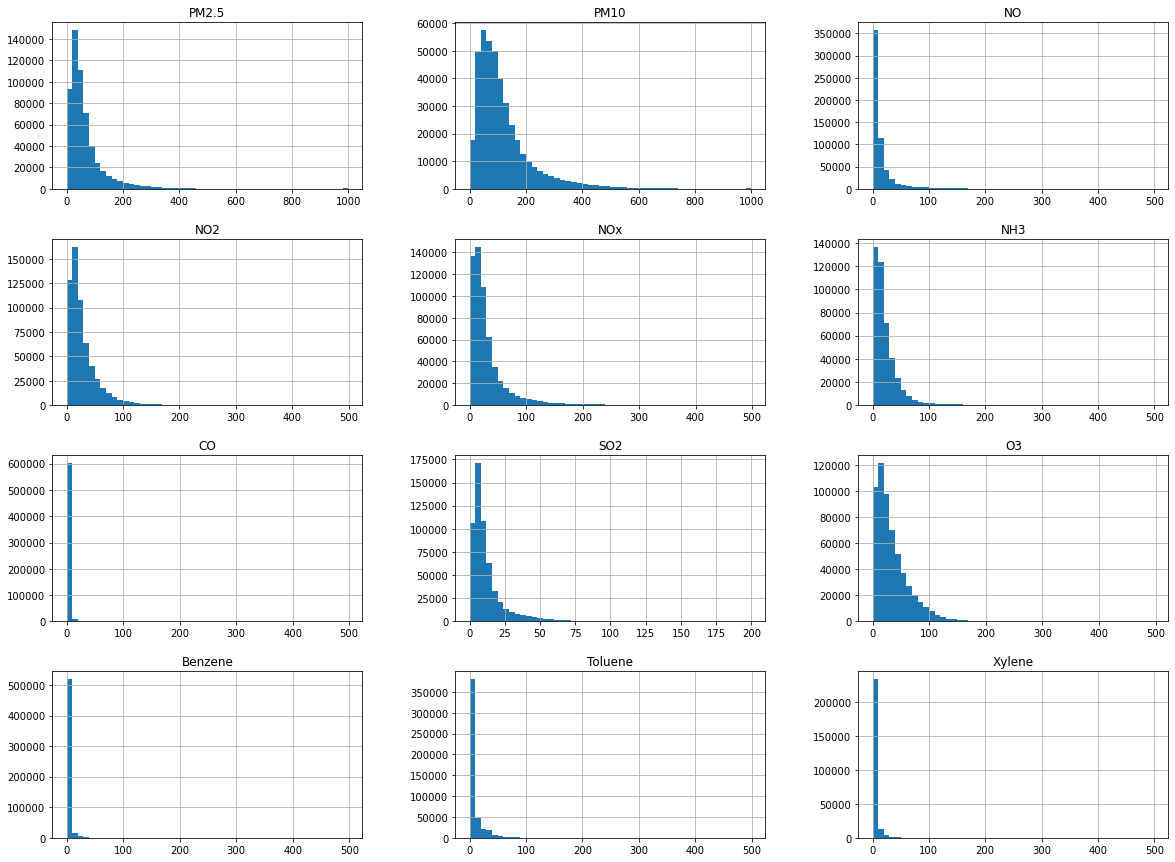

time: 1.36 s


In [7]:
df.hist(bins=50, figsize=(20, 15))

In [8]:
df_delhi = df.loc[df["City"] == "Delhi"]
df_mumbai = df.loc[df["City"] == "Mumbai"]

time: 57 ms


In [9]:
delhi_corr = df_delhi.corr()
mumbai_corr = df_mumbai.corr()
delhi_corr

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
PM2.5,1.000000,0.817281,0.552162,0.540812,0.445918,0.530578,0.171963,0.329637,0.162353,0.608801,0.360406,0.133159
PM10,0.817281,1.000000,0.565145,0.613920,0.453250,0.470723,0.145681,0.396602,0.210378,0.591527,0.341744,0.145107
NO,0.552162,0.565145,1.000000,0.613476,0.635065,0.421890,0.100481,0.336522,0.052345,0.628854,0.474171,0.172114
NO2,0.540812,0.613920,0.613476,1.000000,0.583752,0.417747,0.080108,0.494082,0.204884,0.523310,0.300906,0.110852
NOx,0.445918,0.453250,0.635065,0.583752,1.000000,0.300316,0.183557,0.212612,0.204059,0.613619,0.485274,0.196151
NH3,0.530578,0.470723,0.421890,0.417747,0.300316,1.000000,0.274877,0.133928,0.070758,0.384548,0.145082,0.114261
CO,0.171963,0.145681,0.100481,0.080108,0.183557,0.274877,1.000000,-0.086542,-0.043398,0.206835,0.074438,0.300710
SO2,0.329637,0.396602,0.336522,0.494082,0.212612,0.133928,-0.086542,1.000000,0.202664,0.285189,0.120027,-0.020454
O3,0.162353,0.210378,0.052345,0.204884,0.204059,0.070758,-0.043398,0.202664,1.000000,0.087152,-0.125549,-0.029644
Benzene,0.608801,0.591527,0.628854,0.523310,0.613619,0.384548,0.206835,0.285189,0.087152,1.000000,0.641276,0.262516


time: 27 ms


array([[<AxesSubplot:xlabel='PM2.5', ylabel='PM2.5'>,
        <AxesSubplot:xlabel='PM10', ylabel='PM2.5'>,
        <AxesSubplot:xlabel='NO', ylabel='PM2.5'>,
        <AxesSubplot:xlabel='NO2', ylabel='PM2.5'>,
        <AxesSubplot:xlabel='NOx', ylabel='PM2.5'>,
        <AxesSubplot:xlabel='NH3', ylabel='PM2.5'>,
        <AxesSubplot:xlabel='CO', ylabel='PM2.5'>,
        <AxesSubplot:xlabel='SO2', ylabel='PM2.5'>,
        <AxesSubplot:xlabel='O3', ylabel='PM2.5'>,
        <AxesSubplot:xlabel='Benzene', ylabel='PM2.5'>,
        <AxesSubplot:xlabel='Toluene', ylabel='PM2.5'>,
        <AxesSubplot:xlabel='Xylene', ylabel='PM2.5'>],
       [<AxesSubplot:xlabel='PM2.5', ylabel='PM10'>,
        <AxesSubplot:xlabel='PM10', ylabel='PM10'>,
        <AxesSubplot:xlabel='NO', ylabel='PM10'>,
        <AxesSubplot:xlabel='NO2', ylabel='PM10'>,
        <AxesSubplot:xlabel='NOx', ylabel='PM10'>,
        <AxesSubplot:xlabel='NH3', ylabel='PM10'>,
        <AxesSubplot:xlabel='CO', ylabel='PM10'>,
      

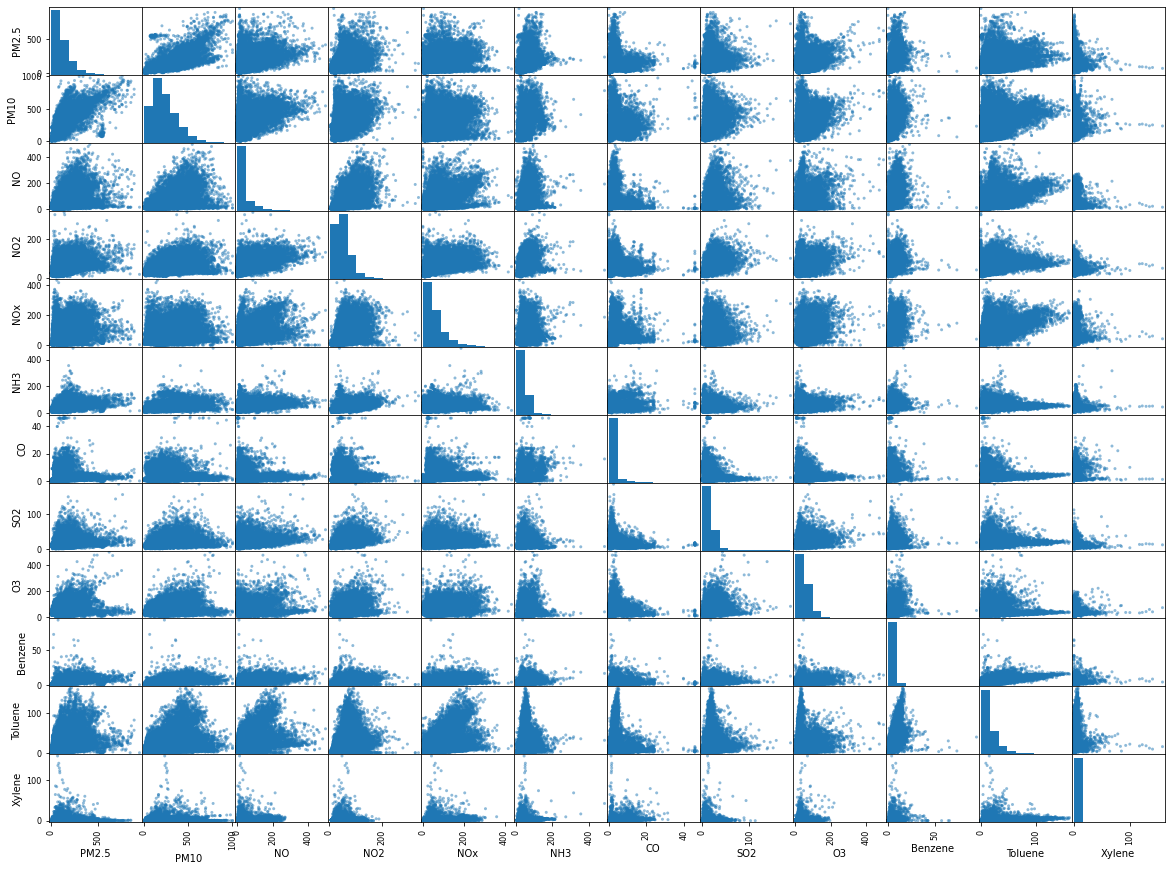

time: 17.1 s


In [10]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_delhi, figsize=(20,15))

In [11]:
delhi_corr["O3"].sort_values(ascending = False)

O3         1.000000
PM10       0.210378
NO2        0.204884
NOx        0.204059
SO2        0.202664
PM2.5      0.162353
Benzene    0.087152
NH3        0.070758
NO         0.052345
Xylene    -0.029644
CO        -0.043398
Toluene   -0.125549
Name: O3, dtype: float64

time: 1.06 ms


<AxesSubplot:>

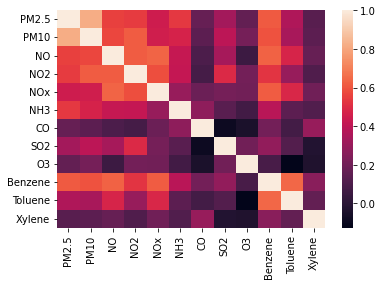

time: 583 ms


In [12]:
import seaborn as sns
sns.heatmap(df_delhi.corr())

In [13]:
df_delhi.isnull().sum()

City            0
Datetime        0
PM2.5         375
PM10         2421
NO            298
NO2           330
NOx            25
NH3           980
CO            364
SO2          2852
O3           2201
Benzene        38
Toluene        26
Xylene      18904
dtype: int64

time: 7.5 ms


In [14]:
df_mumbai.isnull().sum()

City            0
Datetime        0
PM2.5       30008
PM10        30797
NO          30593
NO2         30660
NOx         13139
NH3         38750
CO           1888
SO2         30024
O3          29927
Benzene      6531
Toluene     24780
Xylene      25127
dtype: int64

time: 6 ms


Text(0.5, 1.0, 'Delhi Interpolated')

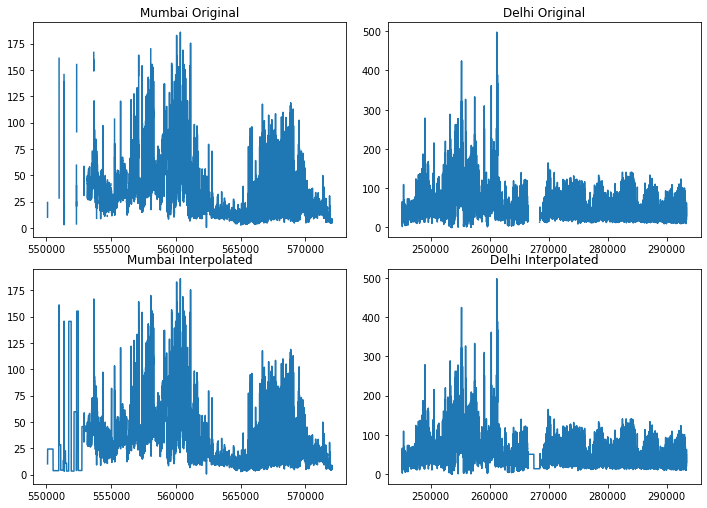

time: 387 ms


In [43]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html 
df_delhi_filled = df_delhi.interpolate(method='nearest')
df_mumbai_filled = df_mumbai.interpolate(method='nearest')

fig, ax = plt.subplots(2, 2, figsize=(10,7))
fig.tight_layout()

ax[0,0].plot(df_mumbai["O3"])
ax[0,0].set_title("Mumbai Original")

ax[1,0].plot(df_mumbai_filled["O3"])
ax[1,0].set_title("Mumbai Interpolated")

ax[0,1].plot(df_delhi["O3"])
ax[0,1].set_title("Delhi Original")

ax[1,1].plot(df_delhi_filled["O3"])
ax[1,1].set_title("Delhi Interpolated")

In [44]:
import scipy.stats as stats
df_delhi_z = df_delhi_filled.select_dtypes(include='number').apply(stats.zscore)
df_mumbai_z = df_mumbai_filled.select_dtypes(include='number').apply(stats.zscore)
df_delhi_z

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
245172,3.549126,4.961363,0.842362,-0.319768,2.638432,-0.708461,2.480631,-1.192660,0.129991,6.726799,2.241700,3.910788
245173,3.400427,4.961363,0.629706,-0.259965,2.417062,-0.699603,3.834078,-1.146835,0.000273,6.063256,1.743413,4.472276
245174,3.070744,4.961363,1.852876,-0.340770,1.685087,-0.639567,9.393726,-1.249211,-0.917463,4.804386,1.178507,4.947854
245175,3.354997,5.255394,0.907032,-0.399149,0.904668,-0.621851,6.710577,-1.102960,-0.895402,3.238549,0.560522,4.837397
245176,3.142149,5.255394,0.420224,-0.475326,0.440260,-0.546067,8.213276,-0.923559,-1.015413,2.354859,0.260467,4.061132
...,...,...,...,...,...,...,...,...,...,...,...,...
293359,-0.777133,-0.748501,-0.649207,-1.013909,-0.836454,-0.591341,-0.358555,-0.487731,-0.187981,-0.593876,0.035154,-0.059518
293360,-0.754944,-0.734718,-0.649009,-0.991483,-0.830322,-0.589865,-0.317850,-0.492606,-0.320641,-0.565970,0.047612,0.032529
293361,-0.715613,-0.705392,-0.650001,-1.061253,-0.854033,-0.586912,-0.331418,-0.530632,-0.340348,-0.584574,-0.054754,0.038666
293362,-0.700155,-0.709119,-0.651984,-1.080831,-0.853420,-0.616930,-0.351771,-0.454581,-0.470361,-0.603178,-0.021174,-0.062586


time: 44.2 ms


array([[<AxesSubplot:title={'center':'PM2.5'}>,
        <AxesSubplot:title={'center':'PM10'}>,
        <AxesSubplot:title={'center':'NO'}>],
       [<AxesSubplot:title={'center':'NO2'}>,
        <AxesSubplot:title={'center':'NOx'}>,
        <AxesSubplot:title={'center':'NH3'}>],
       [<AxesSubplot:title={'center':'CO'}>,
        <AxesSubplot:title={'center':'SO2'}>,
        <AxesSubplot:title={'center':'O3'}>],
       [<AxesSubplot:title={'center':'Benzene'}>,
        <AxesSubplot:title={'center':'Toluene'}>,
        <AxesSubplot:title={'center':'Xylene'}>]], dtype=object)

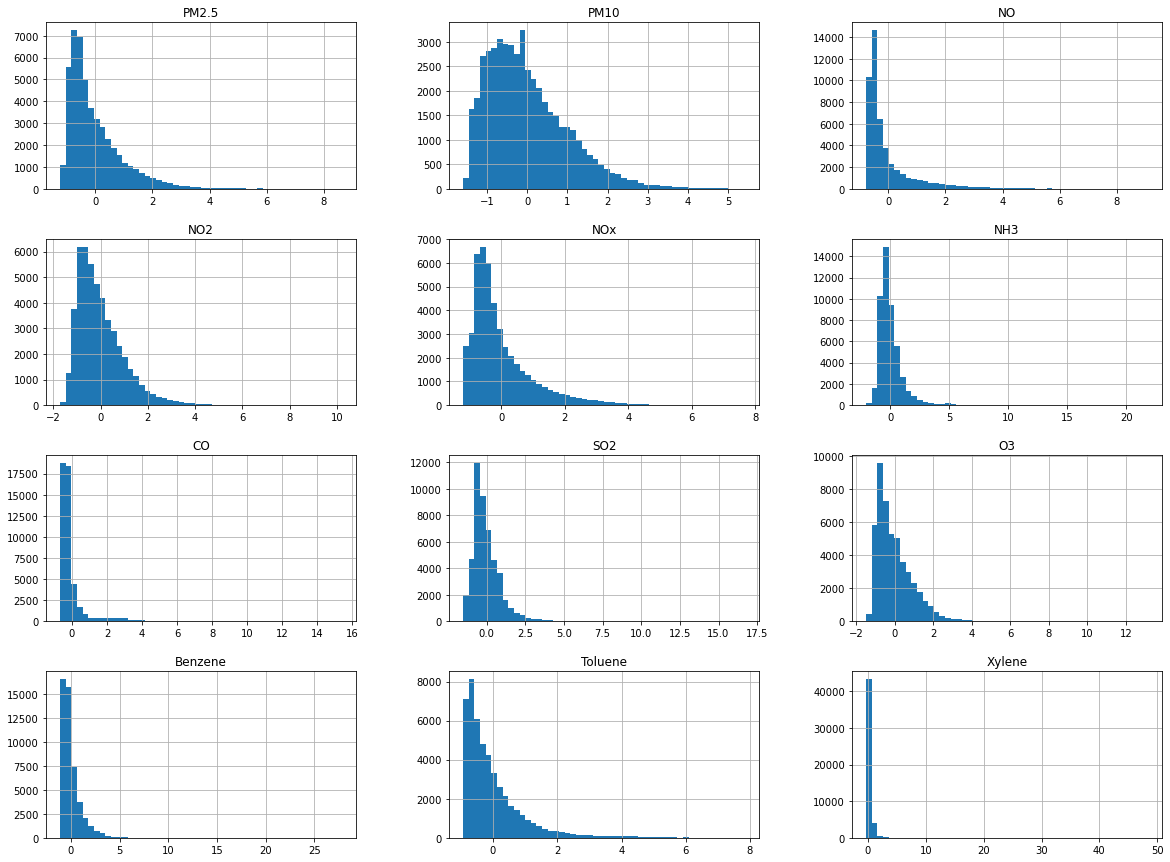

time: 1.17 s


In [45]:
df_delhi_z.hist(bins=50, figsize=(20,15))

In [19]:
df_delhi.to_csv("processed_data/delhi_aq.csv")
df_mumbai.to_csv("processed_data/mumbai_aq.csv")

time: 445 ms
